Dhea Gita (H071201030)

# <font color = '#008080'>Algoritma Regresi</font>

### <font color = '#808080'>Informasi Data</font>
Kumpulan data NASA yang diperoleh dari serangkaian uji aerodinamis dan akustik bagian bilah airfoil dua dan tiga dimensi yang dilakukan di terowongan angin anechoic, terdiri dari airfoil NACA 0012 ukuran berbeda pada berbagai kecepatan terowongan angin dan sudut serang. Rentang airfoil dan posisi pengamat sama di semua percobaan.


### <font color = '#808080'>Informasi Atribut</font>
Masalah ini memiliki input sebagai berikut:
* **Frequency**, in Hertzs.
* **Angle of attack**, in degrees.
* **Chord length**, in meters.
* **Free-stream velocity**, in meters per second.
* **Suction side displacement thickness**, in meters.
Output:
* **Scaled sound pressure level**, in decibels.

    
### <font color = '#808080'>Goal</font>
Tujuan projek ini adalah untuk memprediksi `sound_level` dari serangkaian uji aerodimis dan akuistik bilah airfoil.


### <font color = '#808080'>Objektif</font>
* Part 1: Read Data
* Part 2: Split Dataset
* Part 3: Machine Learning dan Pengujian Metode
* Part 4: Kesimpulan


### <font color = '#808080'>Sumber Data</font>
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise


### <font color = '#808080'>Yang Diperlukan</font>
* Python library: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`
* Datafiles: `airfoil_self_noise.dat`

## Part 1: Read Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
airfoil_data = pd.read_table('Data/airfoil_self_noise.dat', header=None)
airfoil_data.columns = ['frequency', 'attack_angle', 'chord_length', 'fs_velocity', 'ssd_thickness', 'sound_level']
airfoil_data.head()

,frequency,attack_angle,chord_length,fs_velocity,ssd_thickness,sound_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


Cleaning dataset

In [3]:
airfoil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   frequency      1503 non-null   int64  
 1   attack_angle   1503 non-null   float64
 2   chord_length   1503 non-null   float64
 3   fs_velocity    1503 non-null   float64
 4   ssd_thickness  1503 non-null   float64
 5   sound_level    1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [4]:
airfoil_data.isna().any()

frequency        False
attack_angle     False
chord_length     False
fs_velocity      False
ssd_thickness    False
sound_level      False
dtype: bool

In [5]:
airfoil_data.duplicated().any()

False

* Jumlah baris: 1503
* Jumalah fitur: 6
* Variabel target: `sound_level`
* Tidak ada `missing-value`
* Tidak ada data duplikat

Seleksi fitur

In [6]:
airfoil_data.describe()

,frequency,attack_angle,chord_length,fs_velocity,ssd_thickness,sound_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [7]:
airfoil_data.corr()

,frequency,attack_angle,chord_length,fs_velocity,ssd_thickness,sound_level
frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
attack_angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
fs_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
ssd_thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
sound_level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


Berdasarkan tabel korelasi, korelasi antara `sound_level` dengan fitur lainnya rata-rata diatas 0.1, sehingga semua fitur akan digunakan untuk pembuatan model.

## Part 2: Split Dataset

In [8]:
airfoil_data.head()

,frequency,attack_angle,chord_length,fs_velocity,ssd_thickness,sound_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [9]:
X = airfoil_data.drop(['sound_level'], axis=1)
X = X.iloc[:,:]
y = airfoil_data['sound_level']
y = y.iloc[:]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Part 3: Machine Learning dan Pengujian Metode

Mean Squared Error (MSE) atau rata-rata kesalahan kuadrat menghitung rata-rata dari selisih kuadrat antara nilai prediksi dan nilai aktual. Rumusnya adalah sebagai berikut:

MSE = 1/n * ∑(y_actual - y_pred)^2

Semakin rendah nilai MSE, semakin baik kinerja model regresi linear tersebut.

In [11]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

reg_method = LinearRegression()
reg_method.fit(X_train, y_train)
reg_predic = reg_method.predict(X_test)

MSE = 1/len(reg_predic) * sum((y_test-reg_predic)**2)
print('MSE:', MSE)

MSE: 22.556798865620497


In [16]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

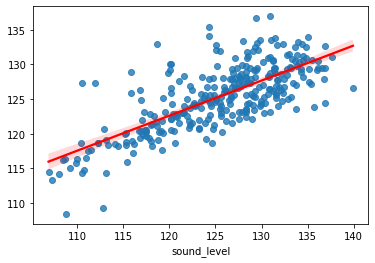

In [17]:
sns.regplot(y_test, reg_predic, line_kws={'color':'red'})
plt.show()

## Part 4: Kesimpulan

Nilai MSE yang dihasilkan yaitu `22.6`, karena nilainya begitu rendah maka dapat dikatakan kesalahan prediksi model ini juga rendah.

Berdasarkan grafik di atas, terdapat hubungan positif antara variabel fitur (X) dan variabel target (y), karena seiring nilai X meningkat maka nilai y meningkat juga. Selain itu, sebaran titik-titik data pada plot cenderung berada dekat garis linear. Sehingga dapat dikatakan model regresi linear sangat cocok untuk digunakan dalam data ini.